# Домашня робота №10

# Закон великих чисел, метод Монте-Карло, центральна гранична теорема

Деякі задачі взяті з підручника

*Збірник задач з теорії ймовірностей та математичної статистики: навч. посібник / В.В. Голомозий, М.В. Карташов, К.В. Ральченко. – К.: Видавничо-поліграфічний центр «Київський університет», 2015. – 366 с.*

Електронну версію збірника можна знайти [за посиланням](http://probability.univ.kiev.ua/userfiles/kmv/gkr-problems.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Закон великих чисел (посилений)

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu$.
Тоді
$$
\frac{\xi_1 + \ldots + \xi_n}{n} \to \mu, \qquad n \to \infty, \quad \text{м.н.}
$$
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.

### 1.1 Геометричний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Geom(p), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $p = 0.05, 0.25, 0.5, 0.75, 0.95$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $p$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

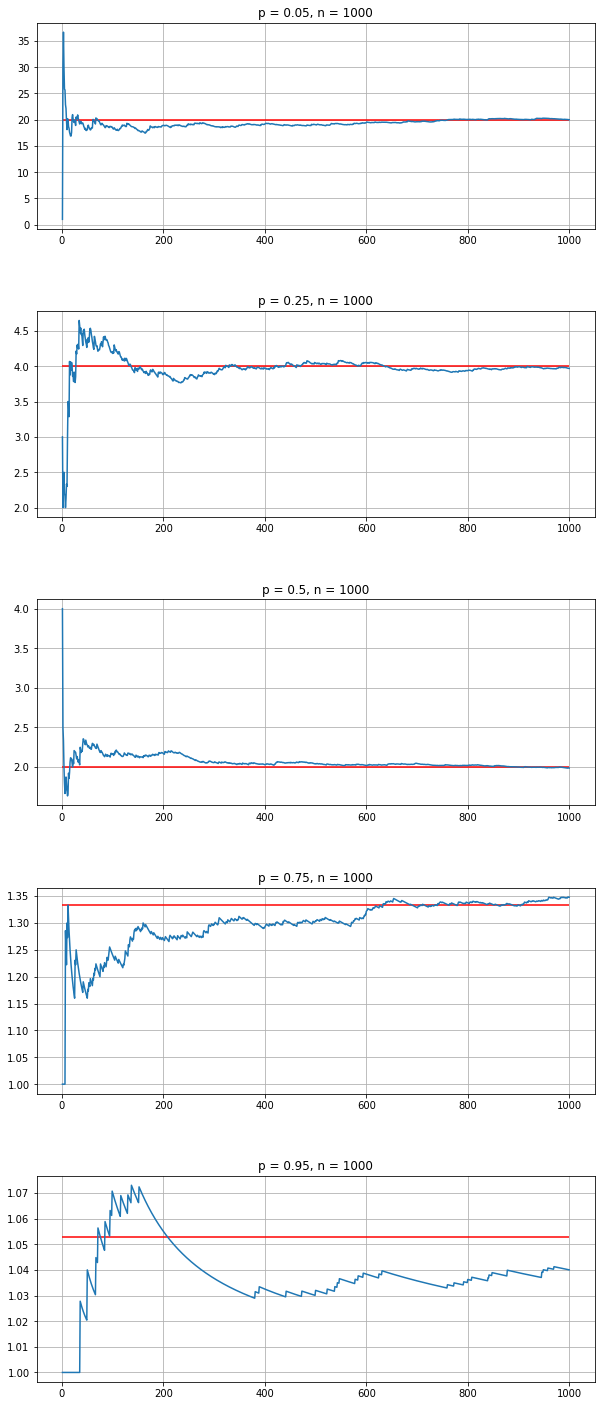

In [3]:
# Місце для Вашого коду
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

p = [0.05, 0.25, 0.5, 0.75, 0.95]
n = np.arange(1, 1001)

fig = plt.figure(figsize=(20,14))
fig.set_size_inches(10, 25)
plt.subplots_adjust(hspace=0.4)


for i, p_i in enumerate(p, 1):
    plt.subplot(5, 1, i)
    rvs = geom(p_i).rvs(size=1000)
    rvs = rvs.cumsum()
    sn_n = rvs/n
    plt.plot(n, sn_n)
    plt.hlines(1/p_i, 0, 1000, "r")
    plt.title('p = {}, n = {}'.format(p_i, 1000))
    plt.grid()
    
plt.show();


### 1.2 Рівномірний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Uniform(a, b), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожної пари параметрів $[a, b] = [0, 1], [-1, 1], [-2, 5]$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожної пари $[a, b]$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

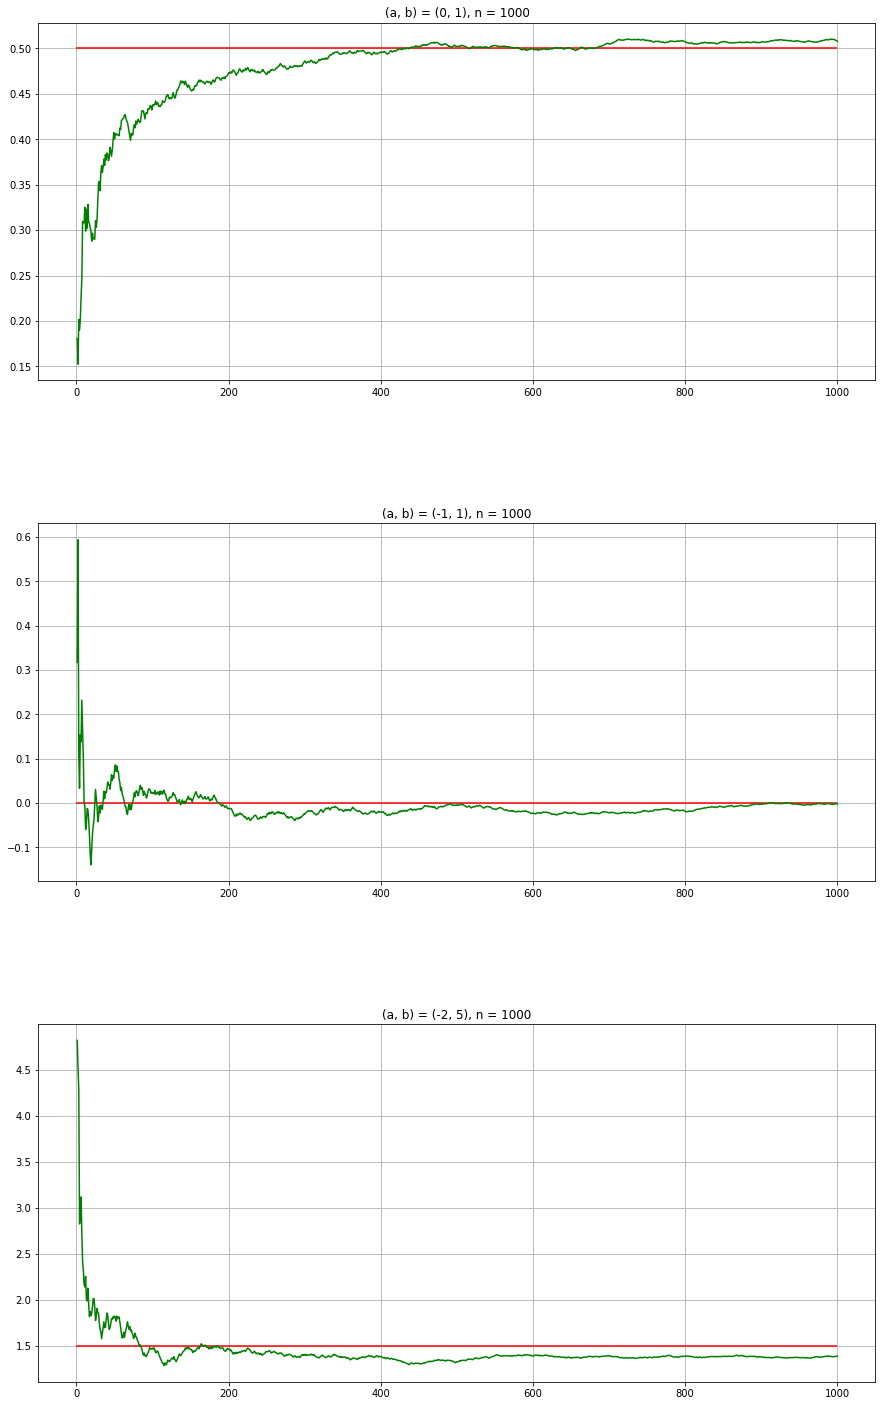

In [4]:
# Місце для Вашого коду
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

a_b = [[0, 1], [-1, 1], [-2, 5]]
n = np.arange(1, 1001)


fig = plt.figure(figsize=(20,15))
fig.set_size_inches(15, 25)
plt.subplots_adjust(hspace=0.4)

for i, (a, b) in enumerate(a_b, 1):
    plt.subplot(3, 1, i)
    xi = uniform(loc=a, scale=(b-a)).rvs(size=1000)
    xi = xi.cumsum()
    plt.plot(n, xi/n, color='g')
    plt.hlines(abs(a + b)/2, 0, 1000, 'r')
    plt.grid()
    plt.title("(a, b) = {}, n = {}".format((a,b), 1000))

plt.show()


### 1.3 Задача 1.18.19

Випадкові величини $(\epsilon_n, n \geq -m)$ незалежні однаково розподілені та квадратично інтегровні.
Довести, що для величин $\xi_n = \sum_{k=0}^{m} c_k \epsilon_{n-k}$
виконується закон великих чисел, де $c_k$ &mdash; довільні сталі.

Нехай $\epsilon_n \sim N(0, 1)$.
Сталі $c_0, \ldots, c_m$ згенеруйте зі стандартного рівномірного розподілу.

Зобразіть графічно збіжність із закону великих чисел для $\xi_n$ для кожного параметра $m = 1, 3, 5, 10, 25, 50, 100$.

Позначимо $S_n = \xi_0 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 10000$ для кожного $m$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

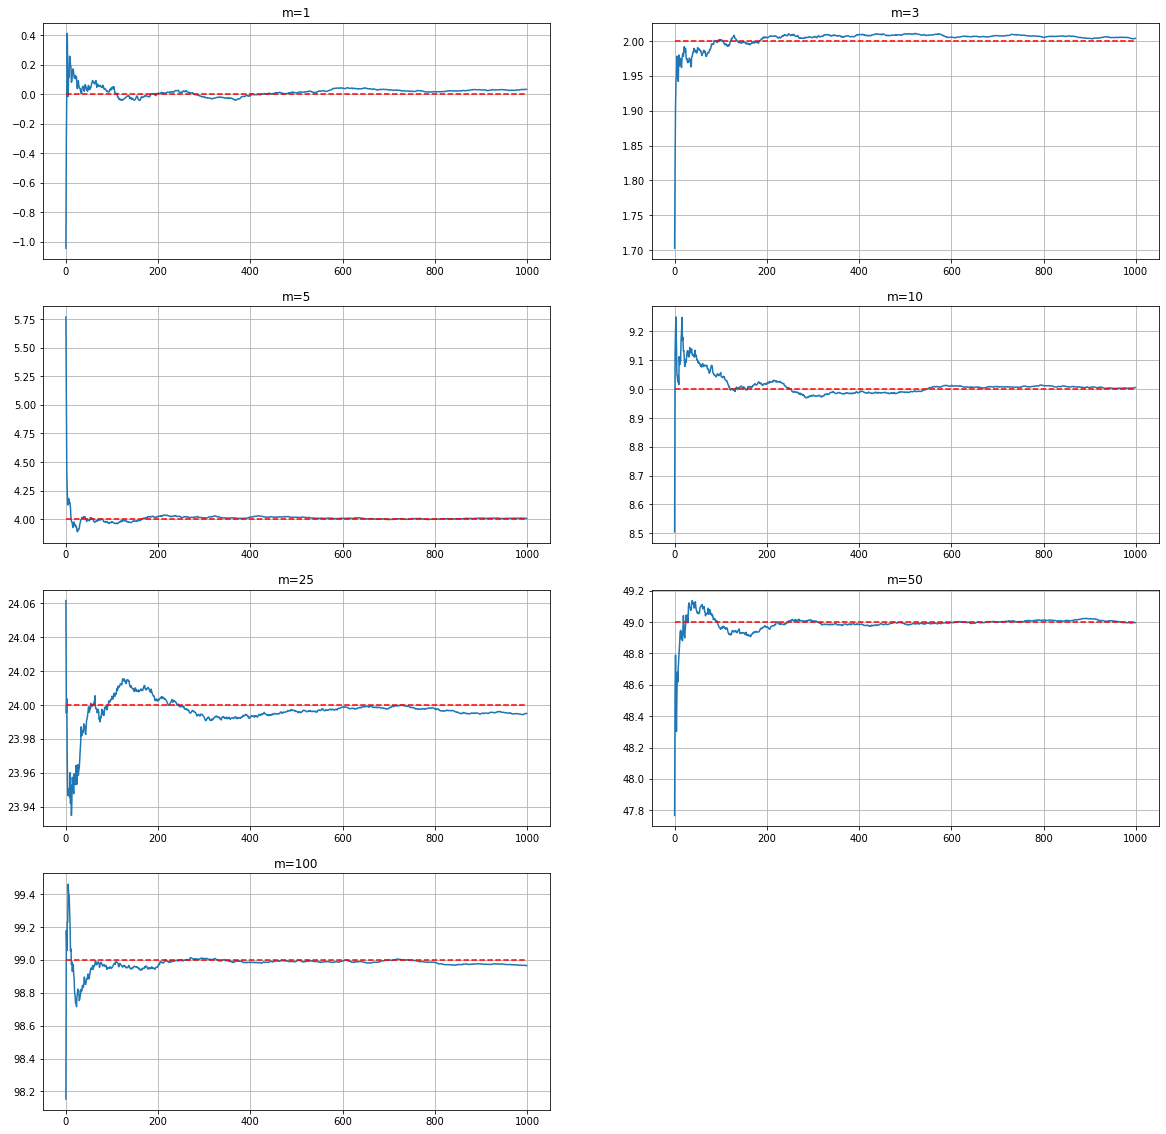

In [6]:
# Місце для Вашого коду
from scipy.stats import norm

m = [1,3,5,10,25,50,100]

def func(m, n=1000):
    ek = list(norm(0,1).rvs(n))
    ck = list(uniform().rvs(m))
    ksi =[]
    for i in range(n):
        k = 0
        for k in range(m):
            k += ck[k]*ek[i-k-1]
        ksi+=[k]
    return ksi

def funcc(ksi, n=1000):
    sn = np.cumsum(ksi)
    s=[]
    for i in range(1, len(sn)+1):
        s+=[sn[i-1]/i]
    return s

fig = plt.figure(figsize=[20,20])

j=0
k=0
for i in range(len(m)):
    sn = funcc(func(m[i]))
    x = range(len(sn))
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(x, sn)
    ax.plot([0,1000], [m[i]-1, m[i]-1],'r--')
    ax.set_title("m={}".format(m[i]))
    j+=1
    if j==3:
        j = 0
        k += 1
    plt.grid()
plt.show()


## 2 Метод Монте-Карло

Метод Монте-Карло полягає в наближеному обчисленні інтегралів за допомогою випадкових величин.
$$
\idotsint_{A} f \left( \overrightarrow{x} \right) \, d\overrightarrow{x} 
= \idotsint_{\mathbf{R^d}} f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= \idotsint_{\mathbf{R^d}}
\frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)}
f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= E \left[ \frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f \left( \overrightarrow{\xi}_i \right) I_{A} \left( \overrightarrow{\xi}_i \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{\xi}_i \right)},
$$
де $f$ &mdash; деяка функція,
$I_B$ &mdash; індикатор множини $B$,
$\overrightarrow{\xi}, \overrightarrow{\xi}_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $C \supset A$
зі щільністю $f_{\overrightarrow{\xi}}$.

Або, в одномірному випадку,
$$
\int_{a}^{b} f(x) \, dx
= \int_{-\infty}^{+\infty} f(x) I_{(a, b)}(x) \, dx
= \int_{-\infty}^{+\infty} \frac{f(x) I_{(a, b)}(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi) I_{(a, b)}(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)},
$$
де $a, b \in \mathbf{R} \cup \{-\infty, +\infty\}$,
$I_B$ &mdash; індикатор множини $B$,
$f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $A \supset (a, b)$ зі щільністю $f_{\xi}$.

Або
$$
\int_{A} f(x) \, dx
= E\left[ f(\xi) \right] m(A)
\approx \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A),
$$
де $f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в., рівномірно розподілені на множині $A$.

### 2.1 Завдання 2.1

Порахуйте наближено $\displaystyle \int_{0}^{1} \sin x \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$
в залежності від $n = 1, \ldots, 1000$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** При розв'язанні даної задачі зручно взяти $\xi_i \sim Uniform(0, 1)$.

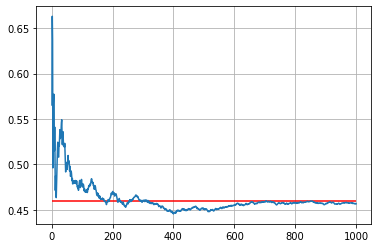

In [7]:
# Місце для Вашого коду
xi = uniform(0, 1).rvs(size = 1000)
t = np.cos(0) - np.cos(1)
N = np.arange(1, 1001)

a = np.sin(xi).cumsum()/N

plt.plot(N, a)
plt.hlines(t, 0, 1000, 'r')
plt.grid()
plt.show()


### 2.2 Завдання 2.2

Порахуйте наближено $\displaystyle \int_{1}^{\infty} \frac{1}{x^3} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim Exp(1)$.
2. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
3. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.
4. Порівняйте точність наближення з пунктів $1, 2$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** Замість введення індикатора можна взяти такі $\xi_i$, що $(\xi_i - 1) \sim Exp(1)$.
Тобто поставити параметр `loc=1`.
Тоді
$$
\int_{1}^{\infty} f(x) \, dx
= \int_{1}^{\infty} \frac{f(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i)}{f_{\xi}(\xi_i)}.
$$

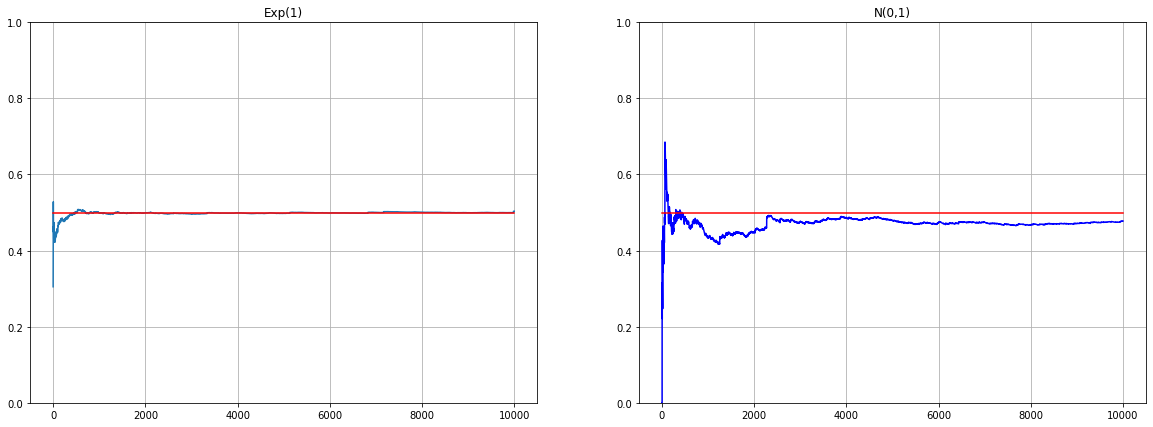

In [8]:
# Місце для Вашого коду
from scipy.stats import expon, norm

func = lambda x: 1/x**3

def exp_sum(ksi):
    rez =0
    for i, element in enumerate(ksi):
        rez += func(element)/exp_rv.pdf(element)
        yield rez/(i+1)

def exp_sum(ksi):
    rez =0
    for i, element in enumerate(ksi):
        rez += func(element)/exp_rv.pdf(element)
        yield rez/(i+1)

def norm_sum(ksi):
    rez =0
    for i, element in enumerate(ksi):
        rez += func(element)/n_rv.pdf(element)*(0 if element<1 else 1)
        yield rez/(i+1)

        
exp_rvs = expon(1).rvs(size=10000)
exp_rv = expon(1)
x1 = list(range(10000))
y1 = list(exp_sum(exp_rvs))

n_rvs = norm().rvs(size=10000)
n_rv = norm()
x = list(range(10000))
y = list(norm_sum(n_rvs))

fig = plt.figure(figsize=[20,7])


plt.subplot(1, 2, 1, ylim=(0, 1))
plt.plot(x1,y1)
plt.plot([1,10000],[1/2,1/2],'r')
plt.title("Exp(1)")
plt.grid()

plt.subplot(1, 2, 2, ylim=(0, 1))
plt.plot(0,1)
plt.plot(x,y,'b')
plt.plot([1,10000],[1/2,1/2],'r')
plt.title("N(0,1)")
plt.grid()

plt.show()


### 2.3 Завдання 2.3

Порахуйте наближено $\displaystyle \int_{-\infty}^{+\infty} e^{-|x|} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

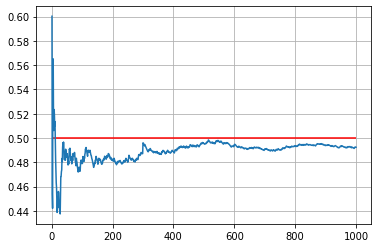

In [9]:
# Місце для Вашого коду
xi = expon.rvs(loc=1, size=1000)
f = 1 / xi ** 3
N = np.arange(1, 1001)

res = f / expon.pdf(xi, loc=1)
res_ = res.cumsum() / N
plt.plot(N, res_)
plt.hlines(0.5, 0, 1000, 'r')
plt.grid()
plt.show()



## 3 Центральна гранична теорема

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu, D(\xi_1) = \sigma^2$.
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.
Тоді
$$
\sqrt{n} \left( \frac{S_n}{n} - \mu \right) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu) \to \zeta,
\qquad n \to \infty,
$$
де $\zeta \sim N(0, \sigma^2)$.

### 3.1 Експоненційний розподіл

Нехай $(\xi_k, k \geq 1)$ &mdash; н.о.р.в.в., де $\xi_k \sim Exp(1), k \geq 1$.

Зобразіть графічно збіжність із центральної граничної теореми.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 200$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu)$, де $\mu = E[\xi_1]$;
- графік функції щільності $\zeta \sim N(0, \sigma^2)$, де $\sigma^2 = D(\xi_1)$.

**Зауваження.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функцію `numpy.sum(axis=1)`.

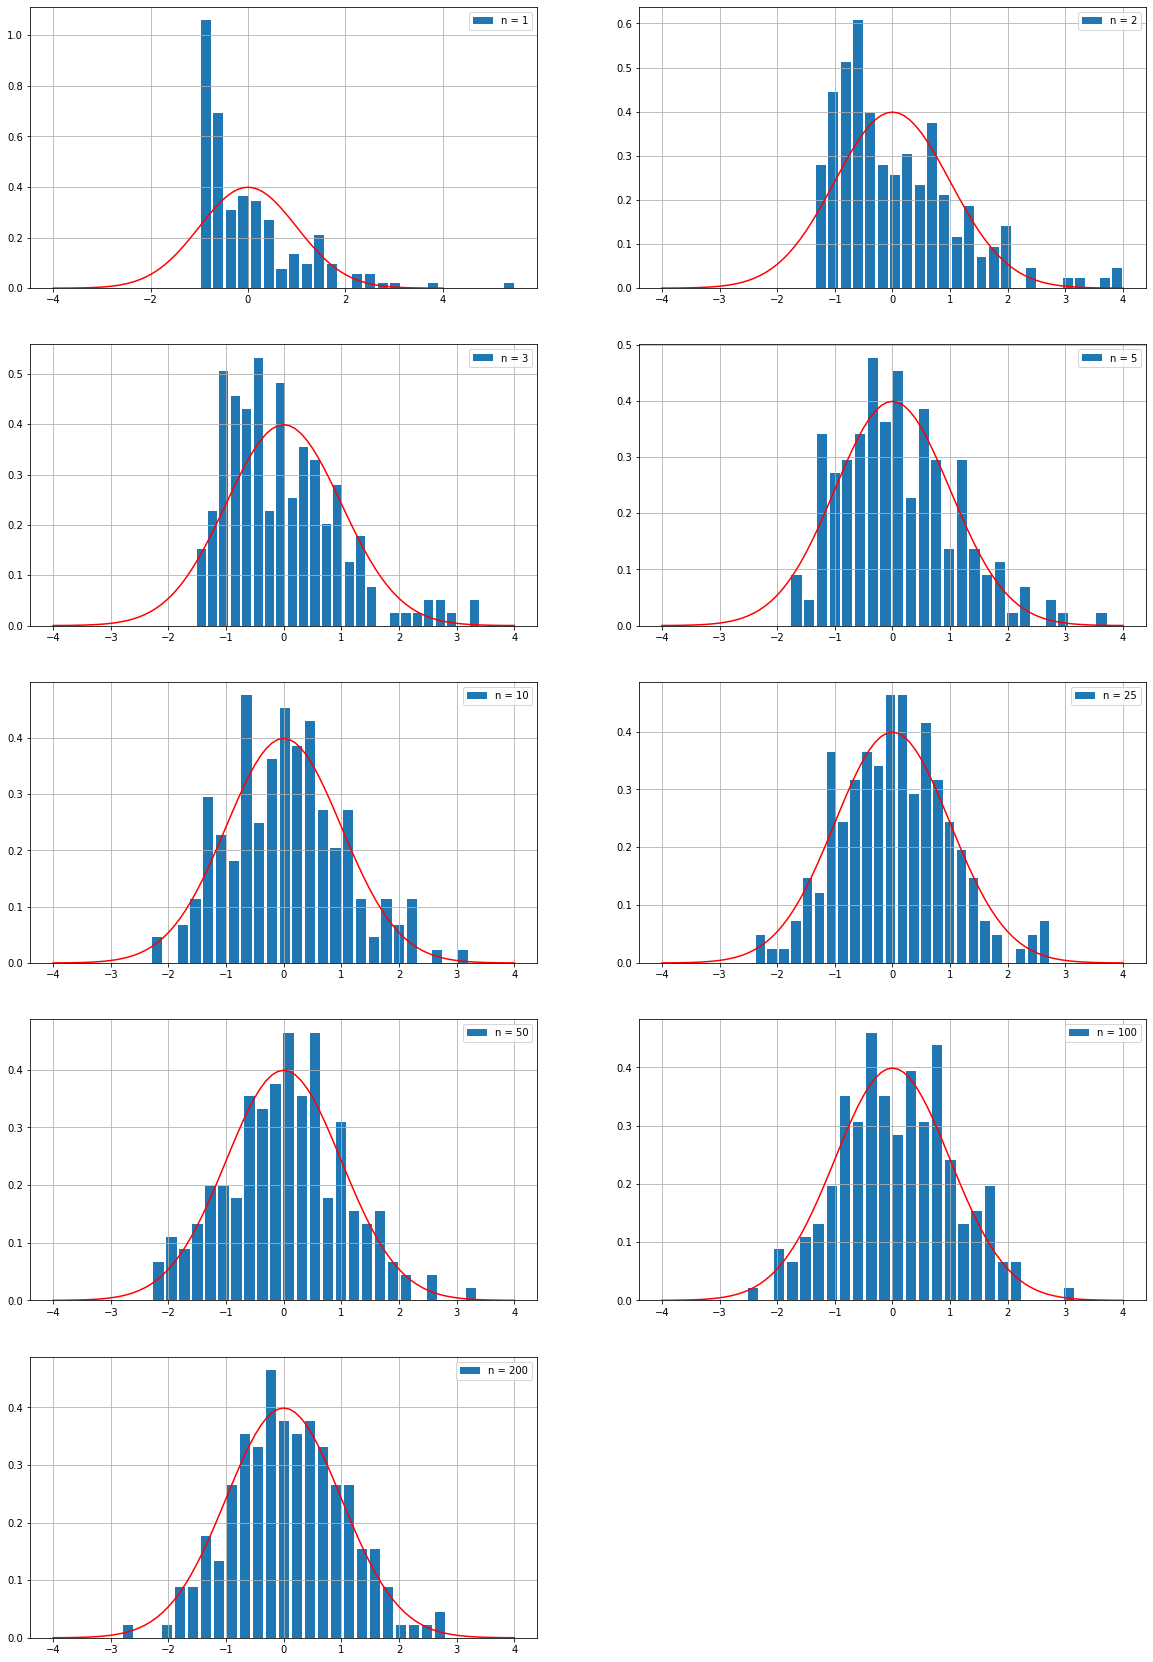

In [10]:
# Місце для Вашого коду
n_samples = 10000
n_list = [1, 2, 3, 5, 10, 25, 50, 100, 200]

plt.figure(figsize=(20, 30))

x = np.arange(-4, 4.1, 0.1)
xi_random = np.array([expon.rvs(0, 1, size=n_samples) for _ in range(200)]) - expon.mean()

for i, n in enumerate(n_list, 1):
    tmp_random_sum = np.sum(xi_random[:, :n], axis=1)
    tmp_random_sum /= np.sqrt(n)
    
    plt.subplot(5, 2, i)
    plt.hist(tmp_random_sum, density=True, rwidth=0.8, bins=25, label='n = {}'.format(n))
    plt.plot(x, norm.pdf(x, loc=0, scale=expon.mean()), 'r')
    
    plt.legend(loc='best')
    plt.grid()

plt.show()


### 3.2 Задача 1.23.24

Випадкові величини $(\xi_k, k \geq 1)$ невід'ємні незалежні однаково розподілені, $E[\xi_1] = 1, D(\xi_1) = \sigma^2$.
Довести, що
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)
\xrightarrow{w} \sigma \zeta \sim N(0, \sigma^2), \quad n \to \infty$.

Нехай $\xi_k \sim Exp(1)$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)$;
- графік функції щільності $\sigma \zeta \sim N(0, \sigma^2)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.sum(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

**Зауваження 3.** Якщо $\sigma \zeta \sim N(0, \sigma^2)$, то $\zeta \sim N(0, 1)$.

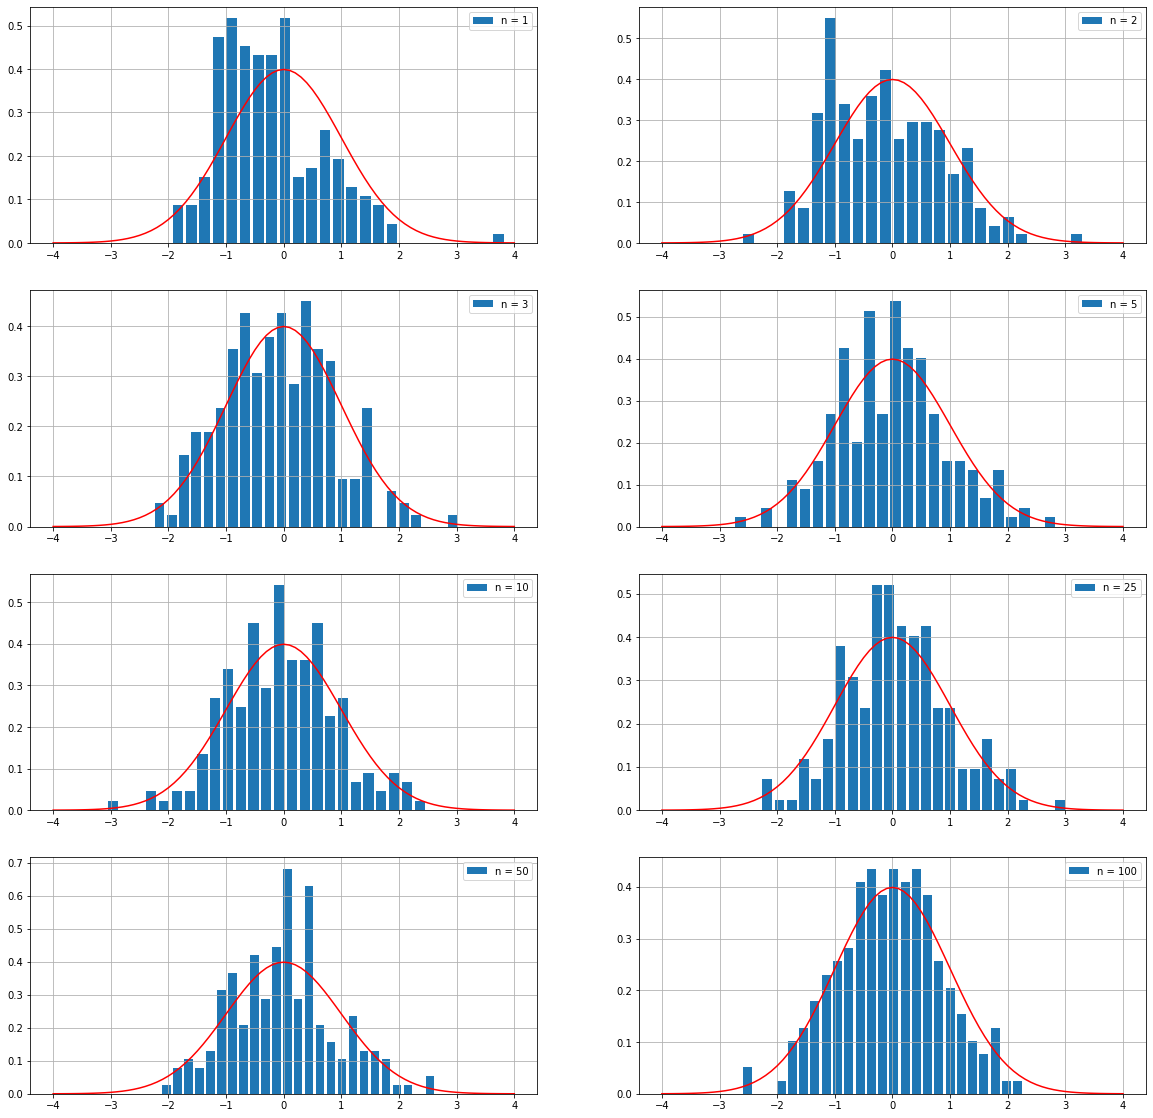

In [11]:
# Місце для Вашого коду
from scipy.stats import expon

n_samples = 10000
xi_rvs1 = np.array([expon.rvs(0, 1, size=n_samples) for _ in range(200)])
n_list = [1, 2, 3, 5, 10, 25, 50, 100]
x = np.arange(-4, 4.1, 0.1)

plt.figure(figsize=(20, 20))

for i, n in enumerate(n_list, 1):
    
    plt.subplot(4, 2, i)
    rez = 2 * (np.sqrt(np.sum(xi_rvs1[:, :n], axis=1)) - np.sqrt(n))
    plt.hist(rez, density=True, rwidth=0.8, bins=25, label='n = {}'.format(n))
    plt.grid()
    plt.legend(loc='best')
    plt.plot(x, norm.pdf(x), 'r')

plt.show()


### 3.3 Задача 1.18.35

Випадкові величини $(\xi_k, k \geq 1)$ незалежні рівномірно розподілені:
$\xi_k \sim Uniform(0, 1), \xi_{(1:n)} = \min_{1 \leq k \leq n} \xi_k, \xi_{(n:n)} = \max_{1 \leq k \leq n} \xi_k$.
Довести, що:
$\displaystyle
\xi_{(1:n)} \xrightarrow{P} 0,
\xi_{(n:n)} \xrightarrow{P} 1,
n \xi_{(1:n)} \xrightarrow{P} \zeta,
n \left( 1 - \xi_{(n:n)} \right) \xrightarrow{P} \zeta,
\quad n \to \infty$, де $\zeta \sim Exp(1)$.

Зобразіть графічно описані в задачі збіжності.

1. Реалізуйте 2 сабплоти в 1 рядку.
2. На першому сабплоті:
   - Зобразіть графік функції $\xi_{(1:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(1:n)}$.
3. На другому сабплоті:
   - Зобразіть графік функції $\xi_{(n:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(n:n)}$.
4. Для кожного $n = 1, 2, 3, 5, 10$ реалізуйте два сабплоти:
   1. На першому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \xi_{(1:n)}$;
      - графік функції щільності $\zeta \sim Exp(1)$.
   2. На другому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \left( 1 - \xi_{(n:n)} \right)$;
      - графік функції щільності $\zeta \sim Exp(1)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функції `numpy.minimum.accumulate` та `numpy.maximum.accumulate`.

**Зауваження 2.** $\xrightarrow{P}$ означає *збіжність за ймовірністю*.

**Зауваження 3.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.min(axis=1)` та `numpy.max(axis=1)`.

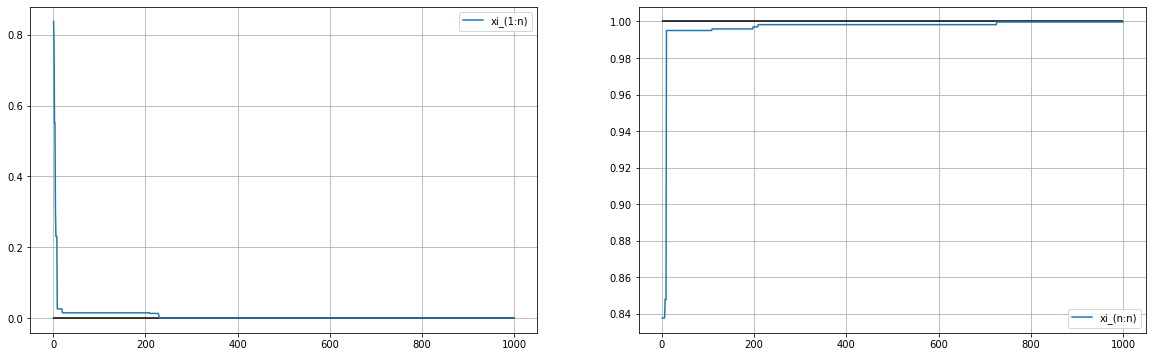

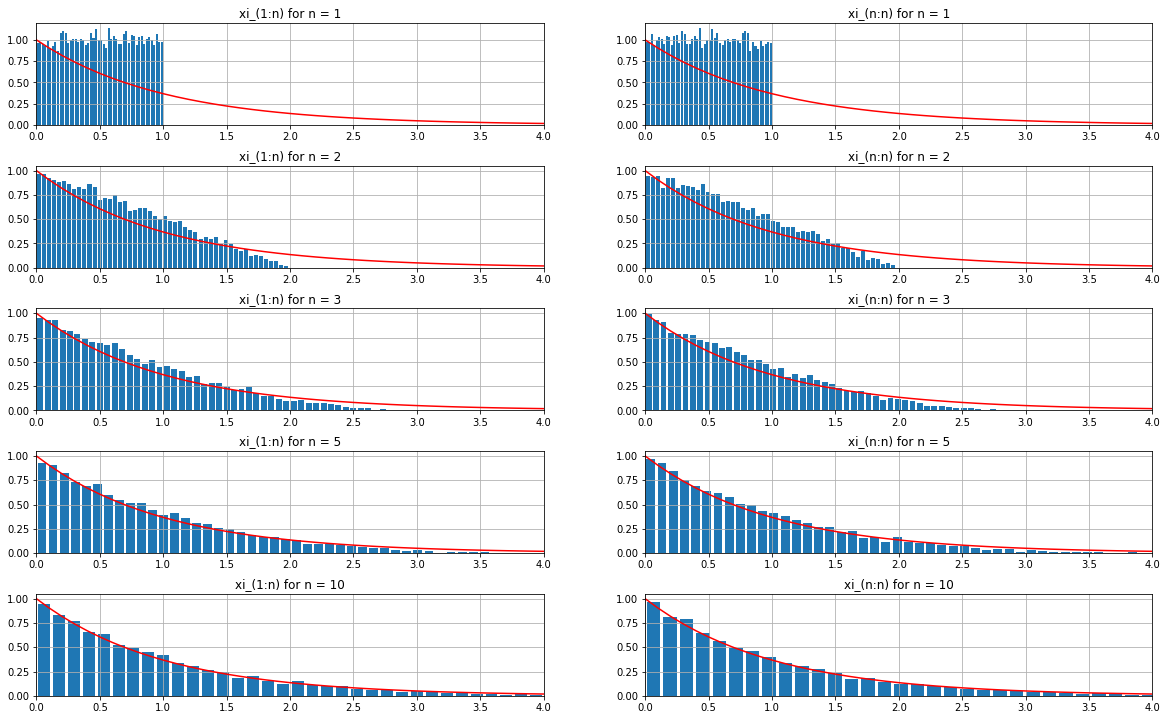

In [12]:
# Місце для Вашого коду
xi = uniform.rvs(size=1000)
N = 10000
xi1 = np.minimum.accumulate(xi)
xi2 = np.maximum.accumulate(xi)

x = np.arange(1, 1001)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(x, xi1, label='xi_(1:n)')
plt.grid()
plt.legend(loc='best')
plt.hlines(0, 0, 1000)

plt.subplot(1, 2, 2)
plt.plot(x, xi2, label='xi_(n:n)')
plt.grid()
plt.legend(loc='best')
plt.hlines(1, 0, 1000)

plt.show()


xi_matrix = np.array([uniform.rvs(0, 1, size=N) for _ in range(100)])

x = np.arange(0, 4.1, 0.1)
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.4)

for i, n in enumerate([1, 2, 3, 5, 10]):
    cur = xi_matrix[:n]
    tmp_values = n * cur.min(axis=0)
    plt.subplot(6, 2, 2*i + 1, xlim=(0, 4))
    plt.hist(tmp_values, density=True, rwidth=0.8, bins=50)
    plt.title("xi_(1:n) for n = {}".format(n))
    plt.plot(x, expon.pdf(x), 'r')
    plt.grid()
    
    tmp_values = n * (1 - cur.max(axis=0))
    plt.subplot(6, 2, 2*i + 2, xlim=(0, 4))
    plt.hist(tmp_values, density=True, rwidth=0.8, bins=50)
    plt.title("xi_(n:n) for n = {}".format(n))
    plt.plot(x, expon.pdf(x), 'r')
    plt.grid()

plt.show()
